In [61]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_curve, auc, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer

В цьому домашньому завданні ми проведемо додаткові експерименти для рішення задачі бінарної класифікації і створимо ваш новий submission на змагання на Kaggle.

-----------


**Завдання 0**. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

**Завдання 1**. **Збираємо весь код з попереднього ДЗ в одному місці.** В лекційному ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb` ми познайомились з поняттям пайплайнів, а також я показала, як компактно виглядає рішення МЛ задачі, якщо ми зберемо весь код разом.

Оскільки ми далі будемо робити експерименти, які включають ті самі етапи попередньої обробки, але інше моделювання - буде зручно мати весь код компактно і під рукою. Тому зараз ми займемось збором коду до купи :) Після цього завдання для подальших експериментів ви можете перенести частини розвʼязку взагалі в окремий `.py` файл, аби було зручно імпортувати функції.

Зі свого рішення в попередньому домашньому завданні (`Логістична регресія з scikit learn.ipynb`) зберіть усі кроки розвʼязку задачі разом з використанням `sklearn.Pipeline` за прикладом з лекції.

Ваш код нижче має містити
1. Читання даних з файлу (поза пайплайном).
2. Розбиття на тренувальний і валідаційний набори, де валідаційний містить 20% даних (поза пайплайном).
3. Виділення категоріальних і числових колонок (поза пайплайном).
4. Підготовку категоріальних і числових колонок (частина пайплайну). В прикладі в лекції ми оформлювали обробку числових і категоріальних колонок в окремі трансформери `numeric_transformer`, `categorical_cols`. Рекоемндую зробити саме так, так потім зручніше вносити зміни :)
5. Тренування лог регресії (частина пайплайну).
6. Запуск пайплайну на тренування на трен. даних (поза пайплайном).
7. Запуск пайплайну на передбачення на трен і вал. даних і вимір метрик якості ROC-AUC + вивдення Confusion Matrix (поза пайплайном).
8. Збереження моделі в формат joblib (поза пайплайном).

Ви це все вже зробили в попереднтьому ДЗ! Тож, тут просто заадча все зібрати разом.

Нижче я додала підказки, що покроково ви маєте зробити. Якщо ви почуваєтесь впевнено, можете видалити ці підказки і реалізувати все самостійно, або ж - просто заповнити пропуски.

Завдання оцінюється в 10 балів. Головний результат - аби код в фіналі був робочий. Бо за не робочий нам гроші ніхто не заплатить :)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
7180,682.0,France,Male,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24
10393,684.0,France,Female,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31
80,705.0,Germany,Male,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01
3365,669.0,Spain,Male,58.0,0.0,0.00,2.0,0.0,1.0,51565.98
12236,707.0,France,Male,21.0,3.0,0.00,2.0,1.0,1.0,148564.76
...,...,...,...,...,...,...,...,...,...,...
9493,633.0,France,Female,33.0,4.0,0.00,2.0,0.0,0.0,123537.05
8463,673.0,France,Female,40.0,1.0,0.00,1.0,1.0,1.0,47832.82
8143,621.0,France,Male,29.0,8.0,0.00,2.0,1.0,1.0,133535.29


['Geography', 'Gender']
[LightGBM] [Info] Number of positive: 2442, number of negative: 9558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203500 -> initscore=-1.364561
[LightGBM] [Info] Start training from score -1.364561
Area under ROC score on  dataset: 0.87%


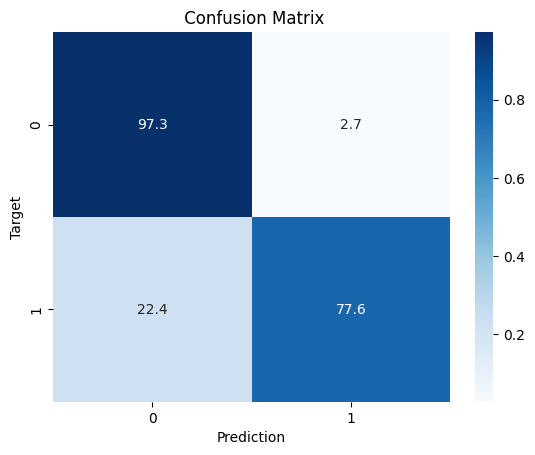

Area under ROC score on  dataset: 0.82%


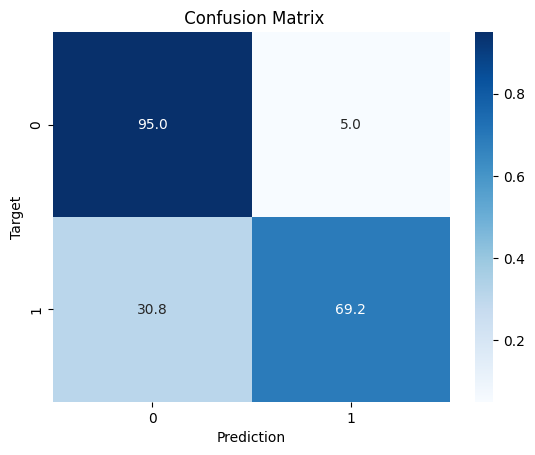

In [33]:
raw_df = pd.read_csv('./train.csv', index_col=0)

train_rest = raw_df.drop(columns=["Exited"])
train_tragets = raw_df["Exited"]
    
train_data, val_data, train_y, val_y = train_test_split(train_rest,
                                                        train_tragets, 
                                                        test_size=0.2, 
                                                        random_state=42, 
                                                        stratify=train_tragets
                                                        )

train_data = train_data.drop(columns=["CustomerId", "Surname"])
display(train_data)

# Виявляємо числові і категоріальні колонки
numeric_cols = train_data.select_dtypes(include=["int", "float"]).columns.tolist()
categorical_cols = train_data.select_dtypes(include=["object"]).columns.tolist()
print(categorical_cols)

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', 
     MinMaxScaler()
     )
])

categorical_transformer = Pipeline(steps=[
    ('onehot', 
     OneHotEncoder(handle_unknown='ignore')
     )
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier())
])

# Тренуємо пайплайн
model_pipeline.fit(train_data, train_y)

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = roc_auc_score(targets, preds)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    confusion_matrix_ = confusion_matrix(targets, preds, normalize="true")
    plt.figure()
    sns.heatmap(confusion_matrix_ , fmt=".1f", annot=confusion_matrix_*100, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline ,train_data ,train_y)
val_preds = predict_and_plot(model_pipeline ,val_data ,val_y)

# Зберігаємо модель для подальшого використання
# joblib.dump(...)


**Завдання 2**. Такс, у нас з вами є вже готовий пайплайн. Давайте проведемо нові експерименти.

  Додайте в попередню обробку числових колонок генерацію polinomal features до степені 2 включно. Для цього створіть новий препроцесор і створіть новий пайплайн.

  Запустіть пайплайн на тренування і виведіть метрики для тренувального і валідаційного набору. Напишіть, як вам модель? Чи спостерігається в цій моделі overfit чи underfit? Чи ця модель добре генералізує?

[LightGBM] [Info] Number of positive: 2442, number of negative: 9558
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10823
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203500 -> initscore=-1.364561
[LightGBM] [Info] Start training from score -1.364561
Area under ROC score on  dataset: 0.90%


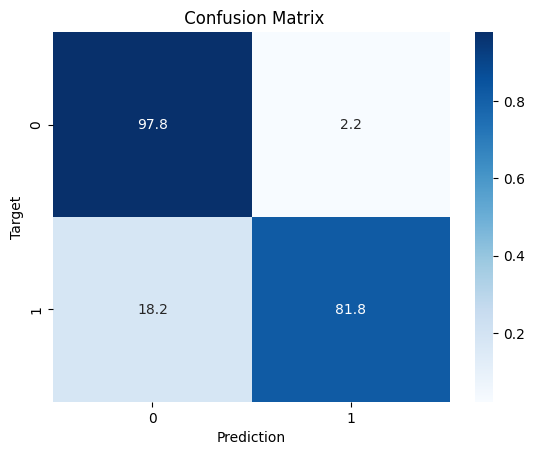

Area under ROC score on  dataset: 0.82%


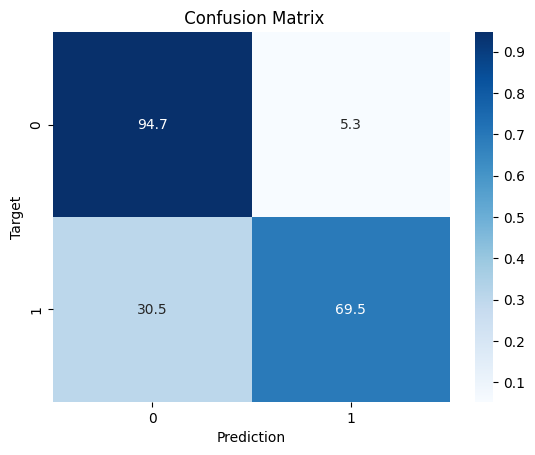

In [38]:
new_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
new_pipeline = Pipeline(steps=[
    ('preprocessor', new_preprocessor),
    ("polynomial", PolynomialFeatures(degree=2)),
    ('classifier', LGBMClassifier())
])

new_pipeline.fit(train_data, train_y)

train_preds = predict_and_plot(new_pipeline ,train_data ,train_y)
val_preds = predict_and_plot(new_pipeline ,val_data ,val_y)


We can see that poly features are helping a bit, but not that much. For validation we can say this is still undefitting

**Завдання 3**. Тепер давайте створимо ще новий пайплайн, тільки тепер поліноміальні ознаки згенеруємо до степені 4. Зробіть висновок про якість моделі. Якщо вам подобається резульат якоїсь з моделей в цьому ДЗ - рекомендую зробити submission в змаганні.

[LightGBM] [Info] Number of positive: 2442, number of negative: 9558
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147159
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 849
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203500 -> initscore=-1.364561
[LightGBM] [Info] Start training from score -1.364561
Area under ROC score on  dataset: 0.91%


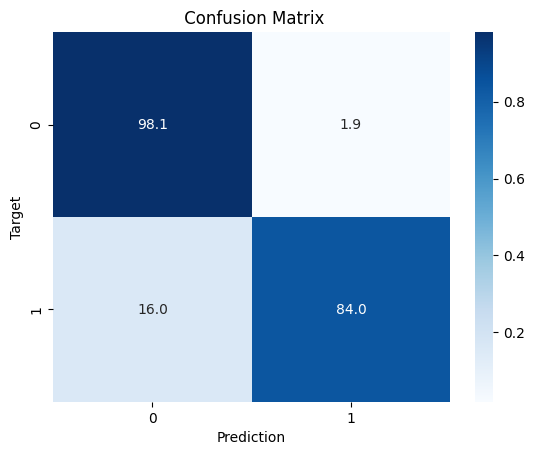

Area under ROC score on  dataset: 0.81%


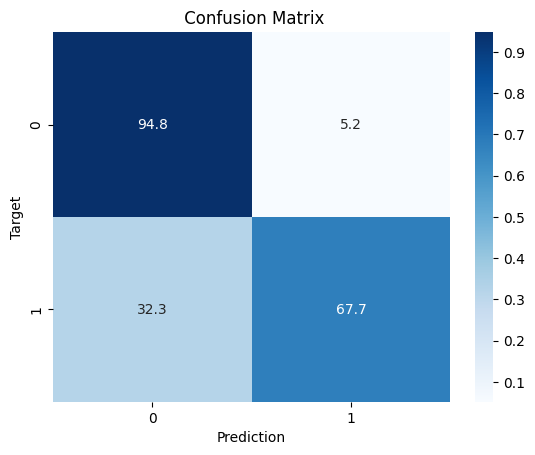

In [40]:
the_new_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

the_new_pipeline = Pipeline(steps=[
    ('preprocessor', the_new_preprocessor),
    ("polynomial", PolynomialFeatures(degree=4, interaction_only=True)),
    ('classifier', LGBMClassifier())
])

the_new_pipeline.fit(train_data, train_y)

train_preds = predict_and_plot(the_new_pipeline ,train_data ,train_y)
val_preds = predict_and_plot(the_new_pipeline ,val_data ,val_y)

We can see that 4 degree features are still helping, and the model is startting to preform better.

**Завдання 4. Перенавчання і регуляризація**.

  Скачайте набір даних `regression_data.csv`. Звичайте набір даних з `regression_data.csv`, розбийте на train і test (в тест 20%) і натренуйте модель лінійної регресії з масштабуванням числових ознак і поліноміальними ознаками до степені **5 включно**.

  Виміряйте якість прогностичної моделі і зробіть висновок, чи модель хороша, чи вона добре генералізує?


In [60]:
regression_df = pd.read_csv("./regression_data.csv")

display(regression_df)

regression_X = regression_df.drop(columns=["target"])
regression_Y = regression_df["target"]

train_data, val_data, train_y, val_y = train_test_split(regression_X,
                                                        regression_Y, 
                                                        test_size=0.2, 
                                                        random_state=42
                                                        )

numeric = train_data.select_dtypes(include=["int", "float"]).columns.tolist()

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric)
    ])

regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ("polynomial", PolynomialFeatures(degree=5, interaction_only=True)),
    ('regression', LinearRegression())
])

regression_pipeline.fit(train_data, train_y)

pred_train = regression_pipeline.predict(train_data)
pred_val = regression_pipeline.predict(val_data)

train_err = mean_squared_error(train_y,pred_train)
val_err = mean_squared_error(val_y,pred_val)


print("Train data MSE:", train_err)
print("Validation data MSE:", val_err)

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-0.190339,-1.382800,-0.875618,0.538910,-1.037246,28.938854
1,-0.321386,-0.563725,0.412931,-0.147057,-0.825497,-7.664581
2,2.122156,-1.519370,1.032465,-1.260884,0.917862,-63.845482
3,-1.380101,-0.055548,-1.703382,0.074095,1.628616,4.076259
4,-0.072829,-1.514847,-0.846794,0.714000,0.473238,34.879013
...,...,...,...,...,...,...
124,1.402794,0.586857,-1.401851,0.791032,-0.909387,39.626185
125,-0.288659,-0.827231,0.322719,-1.002529,-0.018513,-50.585687
126,-1.407464,-0.213447,-0.718444,0.232050,-1.448084,13.719861
127,1.353872,1.237816,-0.114540,-0.469176,-1.713135,-23.851350


Train data MSE: 4.6216164101978725
Validation data MSE: 15.731021452745562


We can say for sure we get an overfit here, because of how big is the difference beween MSE we see

**Завдання 5**. Натренуйте моделі Lasso(), Ridge(), ElasaticNet() на цих даних (з поліном ознаками до степені 20 включно), порівняйте якість з тою, яка була отримана з лог регресією. Яка модель найкраще генералізує і чому на ваш погляд (можливо треба буде для відповіді зробити додатковий аналіз ознак)?

Lasso Train data MSE: 25.99135131035387
Lasso Validation data MSE: 32.170795846866866


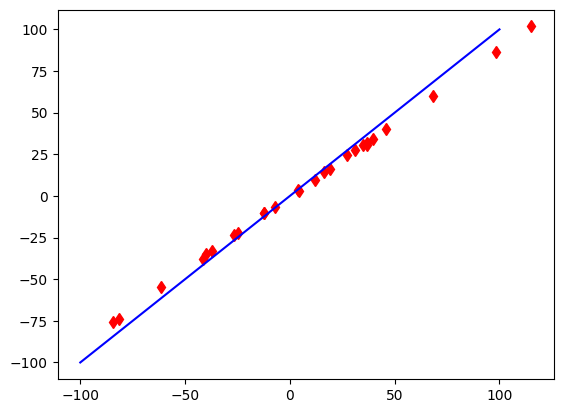

In [93]:
numeric = train_data.select_dtypes(include=["int", "float"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', 
     MinMaxScaler()
     )
])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric)
    ])

regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ("polynomial", PolynomialFeatures(degree=20)),
    ('regression', Lasso())
])

regression_pipeline.fit(train_data, train_y)

pred_train = regression_pipeline.predict(train_data)
pred_val = regression_pipeline.predict(val_data)

train_err = mean_squared_error(train_y,pred_train)
val_err = mean_squared_error(val_y,pred_val)


print("Lasso Train data MSE:", train_err)
print("Lasso Validation data MSE:", val_err)

plt.plot(val_y,pred_val, "rd")
plt.plot([-100, 100],[-100,100], "b")



Ridge Train data MSE: 34.63399070978194
Ridge Validation data MSE: 49.29514648225589


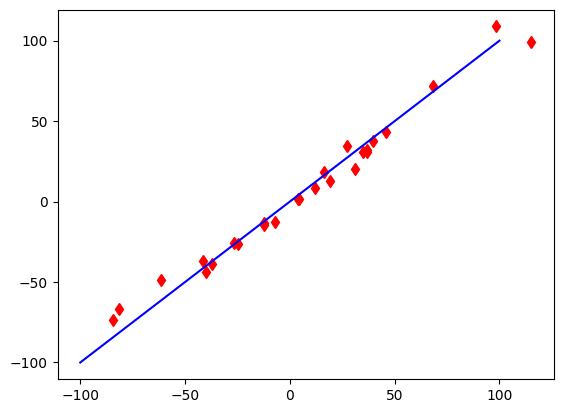

In [92]:
numeric = train_data.select_dtypes(include=["int", "float"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', 
     MinMaxScaler()
     )
])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric)
    ])

regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ("polynomial", PolynomialFeatures(degree=20)),
    ('regression', Ridge())
])

regression_pipeline.fit(train_data, train_y)

pred_train = regression_pipeline.predict(train_data)
pred_val = regression_pipeline.predict(val_data)

train_err = mean_squared_error(train_y,pred_train)
val_err = mean_squared_error(val_y,pred_val)


print("Ridge Train data MSE:", train_err)
print("Ridge Validation data MSE:", val_err)

plt.plot(val_y,pred_val, "rd")
plt.plot([-100, 100],[-100,100], "b")



Elastic Train data MSE: 902.073085597549
Elastic Validation data MSE: 926.7405946386534


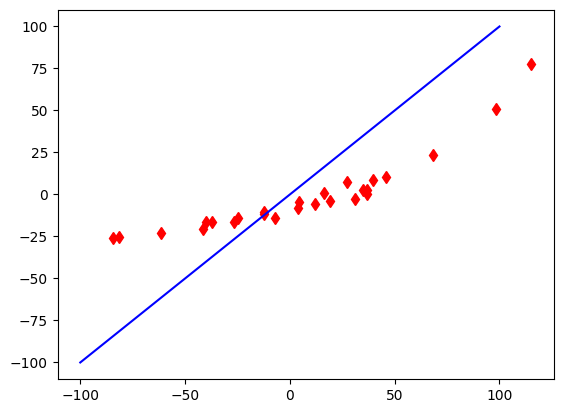

In [91]:
numeric = train_data.select_dtypes(include=["int", "float"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', 
     MinMaxScaler()
     )
])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric)
    ])

regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ("polynomial", PolynomialFeatures(degree=20)),
    ('regression', ElasticNet())
])

regression_pipeline.fit(train_data, train_y)

pred_train = regression_pipeline.predict(train_data)
pred_val = regression_pipeline.predict(val_data)

train_err = mean_squared_error(train_y,pred_train)
val_err = mean_squared_error(val_y,pred_val)


print("Elastic Train data MSE:", train_err)
print("Elastic Validation data MSE:", val_err)

plt.plot(val_y,pred_val, "rd")
plt.plot([-100, 100],[-100,100], "b")

Not sure why that is, but it seems to me that the best estimator in this way is Lasso